# Power Consumption Forecasting

### Vishal Ramesh Patil
### 191030052
### Final Year B-Tech Electrical Engineering
 

Predict kW 48 hours ahead of current time. In this data reading of meter is bi-hourly. We have to get houly reading in predictions. For optimization, our prediction shold not be deviated more than ±5kWh.

## Database Definition

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [3]:
dataset = pd.read_csv("data.csv")

In [4]:
dataset.head(50)

,serial,kWh,kW,kVARh,kVAR,Time_stamp
0,3098000032,10.854,0.000,7.814,0.002,2018-03-01 15:30:00
1,3098000032,10.750,0.000,7.813,0.000,2018-03-01 14:30:00
2,3098000032,12.325,0.086,8.302,0.076,2018-03-05 09:00:00
3,3098000032,12.372,0.094,8.345,0.086,2018-03-05 09:30:00
4,3098000032,12.415,0.086,8.386,0.082,2018-03-05 10:00:00
5,3098000032,12.460,0.090,8.428,0.084,2018-03-05 10:30:00
6,3098000032,12.575,0.230,8.459,0.062,2018-03-05 11:00:00
7,3098000032,12.681,0.212,8.477,0.036,2018-03-05 11:30:00
8,3098000032,12.890,0.418,8.512,0.070,2018-03-05 12:00:00
9,3098000032,13.082,0.384,8.546,0.068,2018-03-05 12:30:00


In [5]:
dataset.describe()

,serial,kWh,kW,kVARh,kVAR
count,1.746200e+04,17462.000000,17462.000000,17462.000000,17462.000000
mean,3.098000e+09,2747.256710,0.750874,1006.527078,0.257706
std,0.000000e+00,1704.039572,1.097139,543.763389,0.247171
min,3.098000e+09,10.750000,0.000000,7.813000,0.000000
25%,3.098000e+09,1358.445000,0.100000,552.427750,0.080000
50%,3.098000e+09,2981.975000,0.212000,1160.990000,0.190000
75%,3.098000e+09,3670.370000,0.834000,1486.230000,0.366000
max,3.098000e+09,6783.840000,6.520000,1721.550000,1.532000


In [6]:
dataset.shape

(17462, 6)

In [7]:
dataset.dtypes

serial          int64
kWh           float64
kW            float64
kVARh         float64
kVAR          float64
Time_stamp     object
dtype: object

In [9]:
# Checking missing values in dataset
dataset.isna().sum()

serial        0
kWh           0
kW            0
kVARh         0
kVAR          0
Time_stamp    0
dtype: int64

## Data Plots

In [10]:
dataset['Time_stamp'] = pd.to_datetime(dataset['Time_stamp'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Time_stamp'])
df = pd.DataFrame(dataset, columns=['kW', 'Time_stamp'])

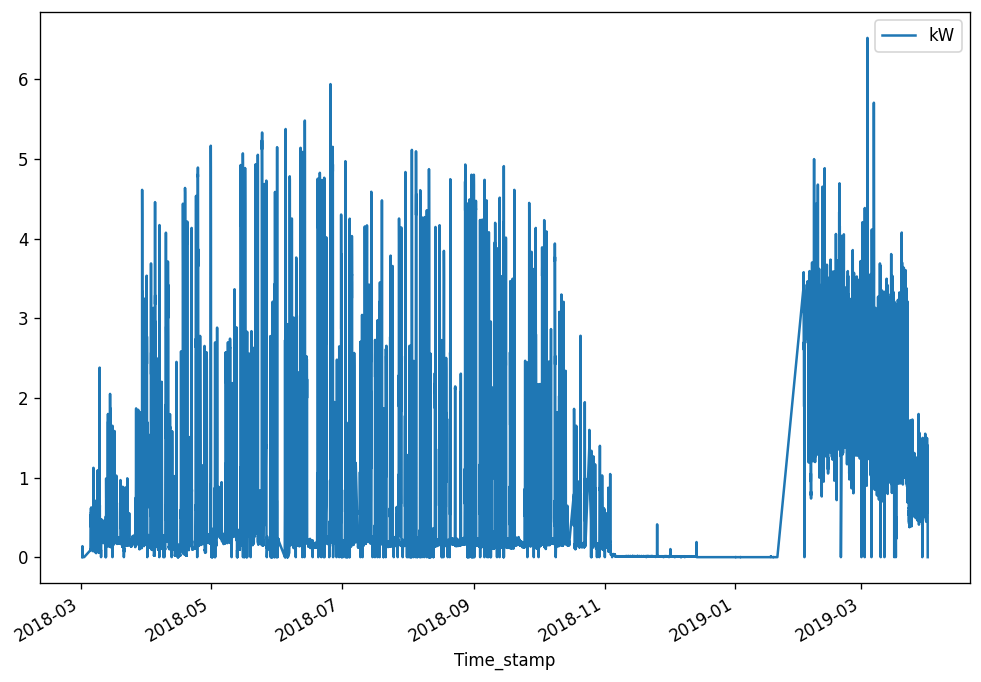

In [11]:
import matplotlib.pyplot as plt
df.plot(x='Time_stamp', y='kW', kind='line') 
plt.show()

## Sorting Database w.r.t time

In [12]:
df.set_index('Time_stamp', inplace=True)

In [13]:
# Sorting Time_wise
df = df.sort_values(['Time_stamp'])

In [14]:
df.shape

(17462, 1)

In [15]:
df.head(31)

,kW
Time_stamp,
2018-03-01 14:30:00,0.000
2018-03-01 15:30:00,0.000
2018-03-01 16:30:00,0.138
2018-03-01 17:00:00,0.000
2018-03-02 11:30:00,0.000
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090


In [ ]:
df.loc['2018-11-12 02:00:00':]

,kW
Time_stamp,
2018-11-12 02:00:00,0.012
2018-11-12 02:30:00,0.012
2018-11-12 03:00:00,0.014
2018-11-12 03:30:00,0.010
2018-11-12 04:00:00,0.014
...,...
2019-03-31 22:00:00,0.982
2019-03-31 22:30:00,1.040
2019-03-31 23:00:00,1.192


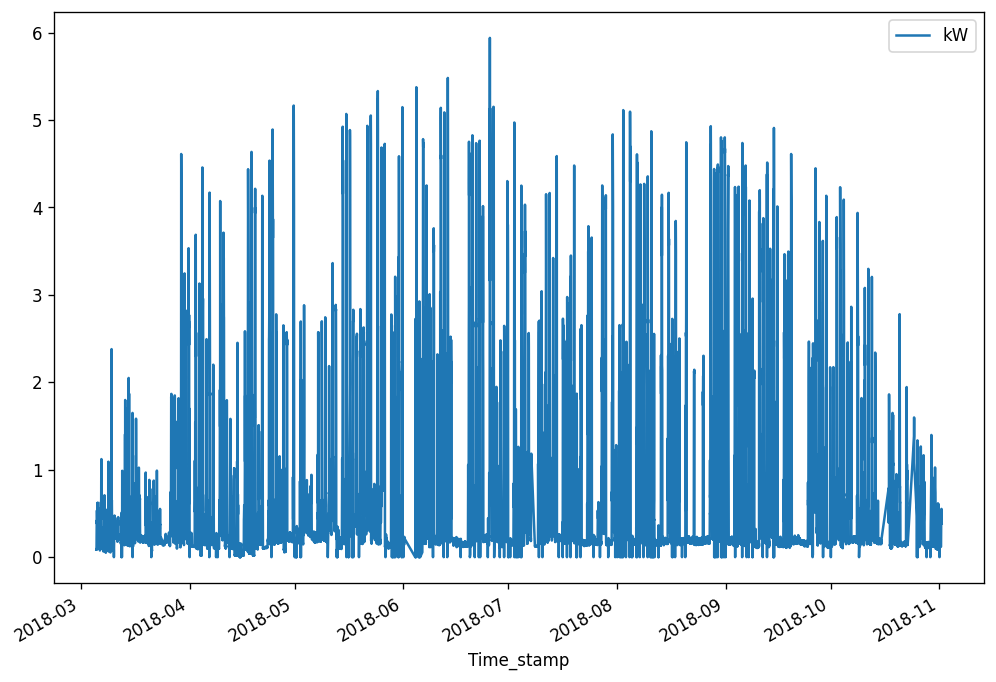

In [17]:
# Actual Data to work on.
df = df.loc['2018-03-05 09:00:00':'2018-11-01 15:30:00']
df.plot()

### Rolling mean & Rolling statistics

In [18]:
fd = df

In [20]:
fd

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


In [21]:
fd.interpolate(method ='linear', limit_direction ='forward') 

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


In [22]:
fd.fillna(method ='pad') 

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


In [23]:
fd.fillna(fd.mean())

,kW
Time_stamp,
2018-03-05 09:00:00,0.086
2018-03-05 09:30:00,0.094
2018-03-05 10:00:00,0.086
2018-03-05 10:30:00,0.090
2018-03-05 11:00:00,0.230
...,...
2018-11-01 13:30:00,0.552
2018-11-01 14:00:00,0.478
2018-11-01 14:30:00,0.424


### Data preprocessing

In [24]:
# Train test split
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

8777 2195


In [25]:
#Create dataset function for LSTM model

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [26]:
time_steps = 10

# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.kW, time_steps)
X_test, y_test = create_dataset(test, test.kW, time_steps)

print(X_train.shape, y_train.shape)

(8767, 10, 1) (8767,)


## LSTM Tensorflow

In [27]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from matplotlib import rc

%config InlineBackend.figure_format='retina'


sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

### Modeling

In [28]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

### Training

In [29]:
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/20
494/494 [==============================] - 8s 12ms/step - loss: 0.2724 - val_loss: 0.3903
Epoch 2/20
494/494 [==============================] - 5s 11ms/step - loss: 0.2081 - val_loss: 0.3602
Epoch 3/20
494/494 [==============================] - 5s 11ms/step - loss: 0.2001 - val_loss: 0.3527
Epoch 4/20
494/494 [==============================] - 5s 11ms/step - loss: 0.1966 - val_loss: 0.3517
Epoch 5/20
494/494 [==============================] - 5s 11ms/step - loss: 0.1948 - val_loss: 0.3521
Epoch 6/20
494/494 [==============================] - 5s 11ms/step - loss: 0.1935 - val_loss: 0.3530
Epoch 7/20
494/494 [==============================] - 5s 11ms/step - loss: 0.1925 - val_loss: 0.3540
Epoch 8/20
494/494 [==============================] - 6s 13ms/step - loss: 0.1915 - val_loss: 0.3551
Epoch 9/20
494/494 [==============================] - 6s 11ms/step - loss: 0.1906 - val_loss: 0.3561
Epoch 10/20
494/494 [==============================] - 5s 11ms/step - loss: 0.1897 - val_lo

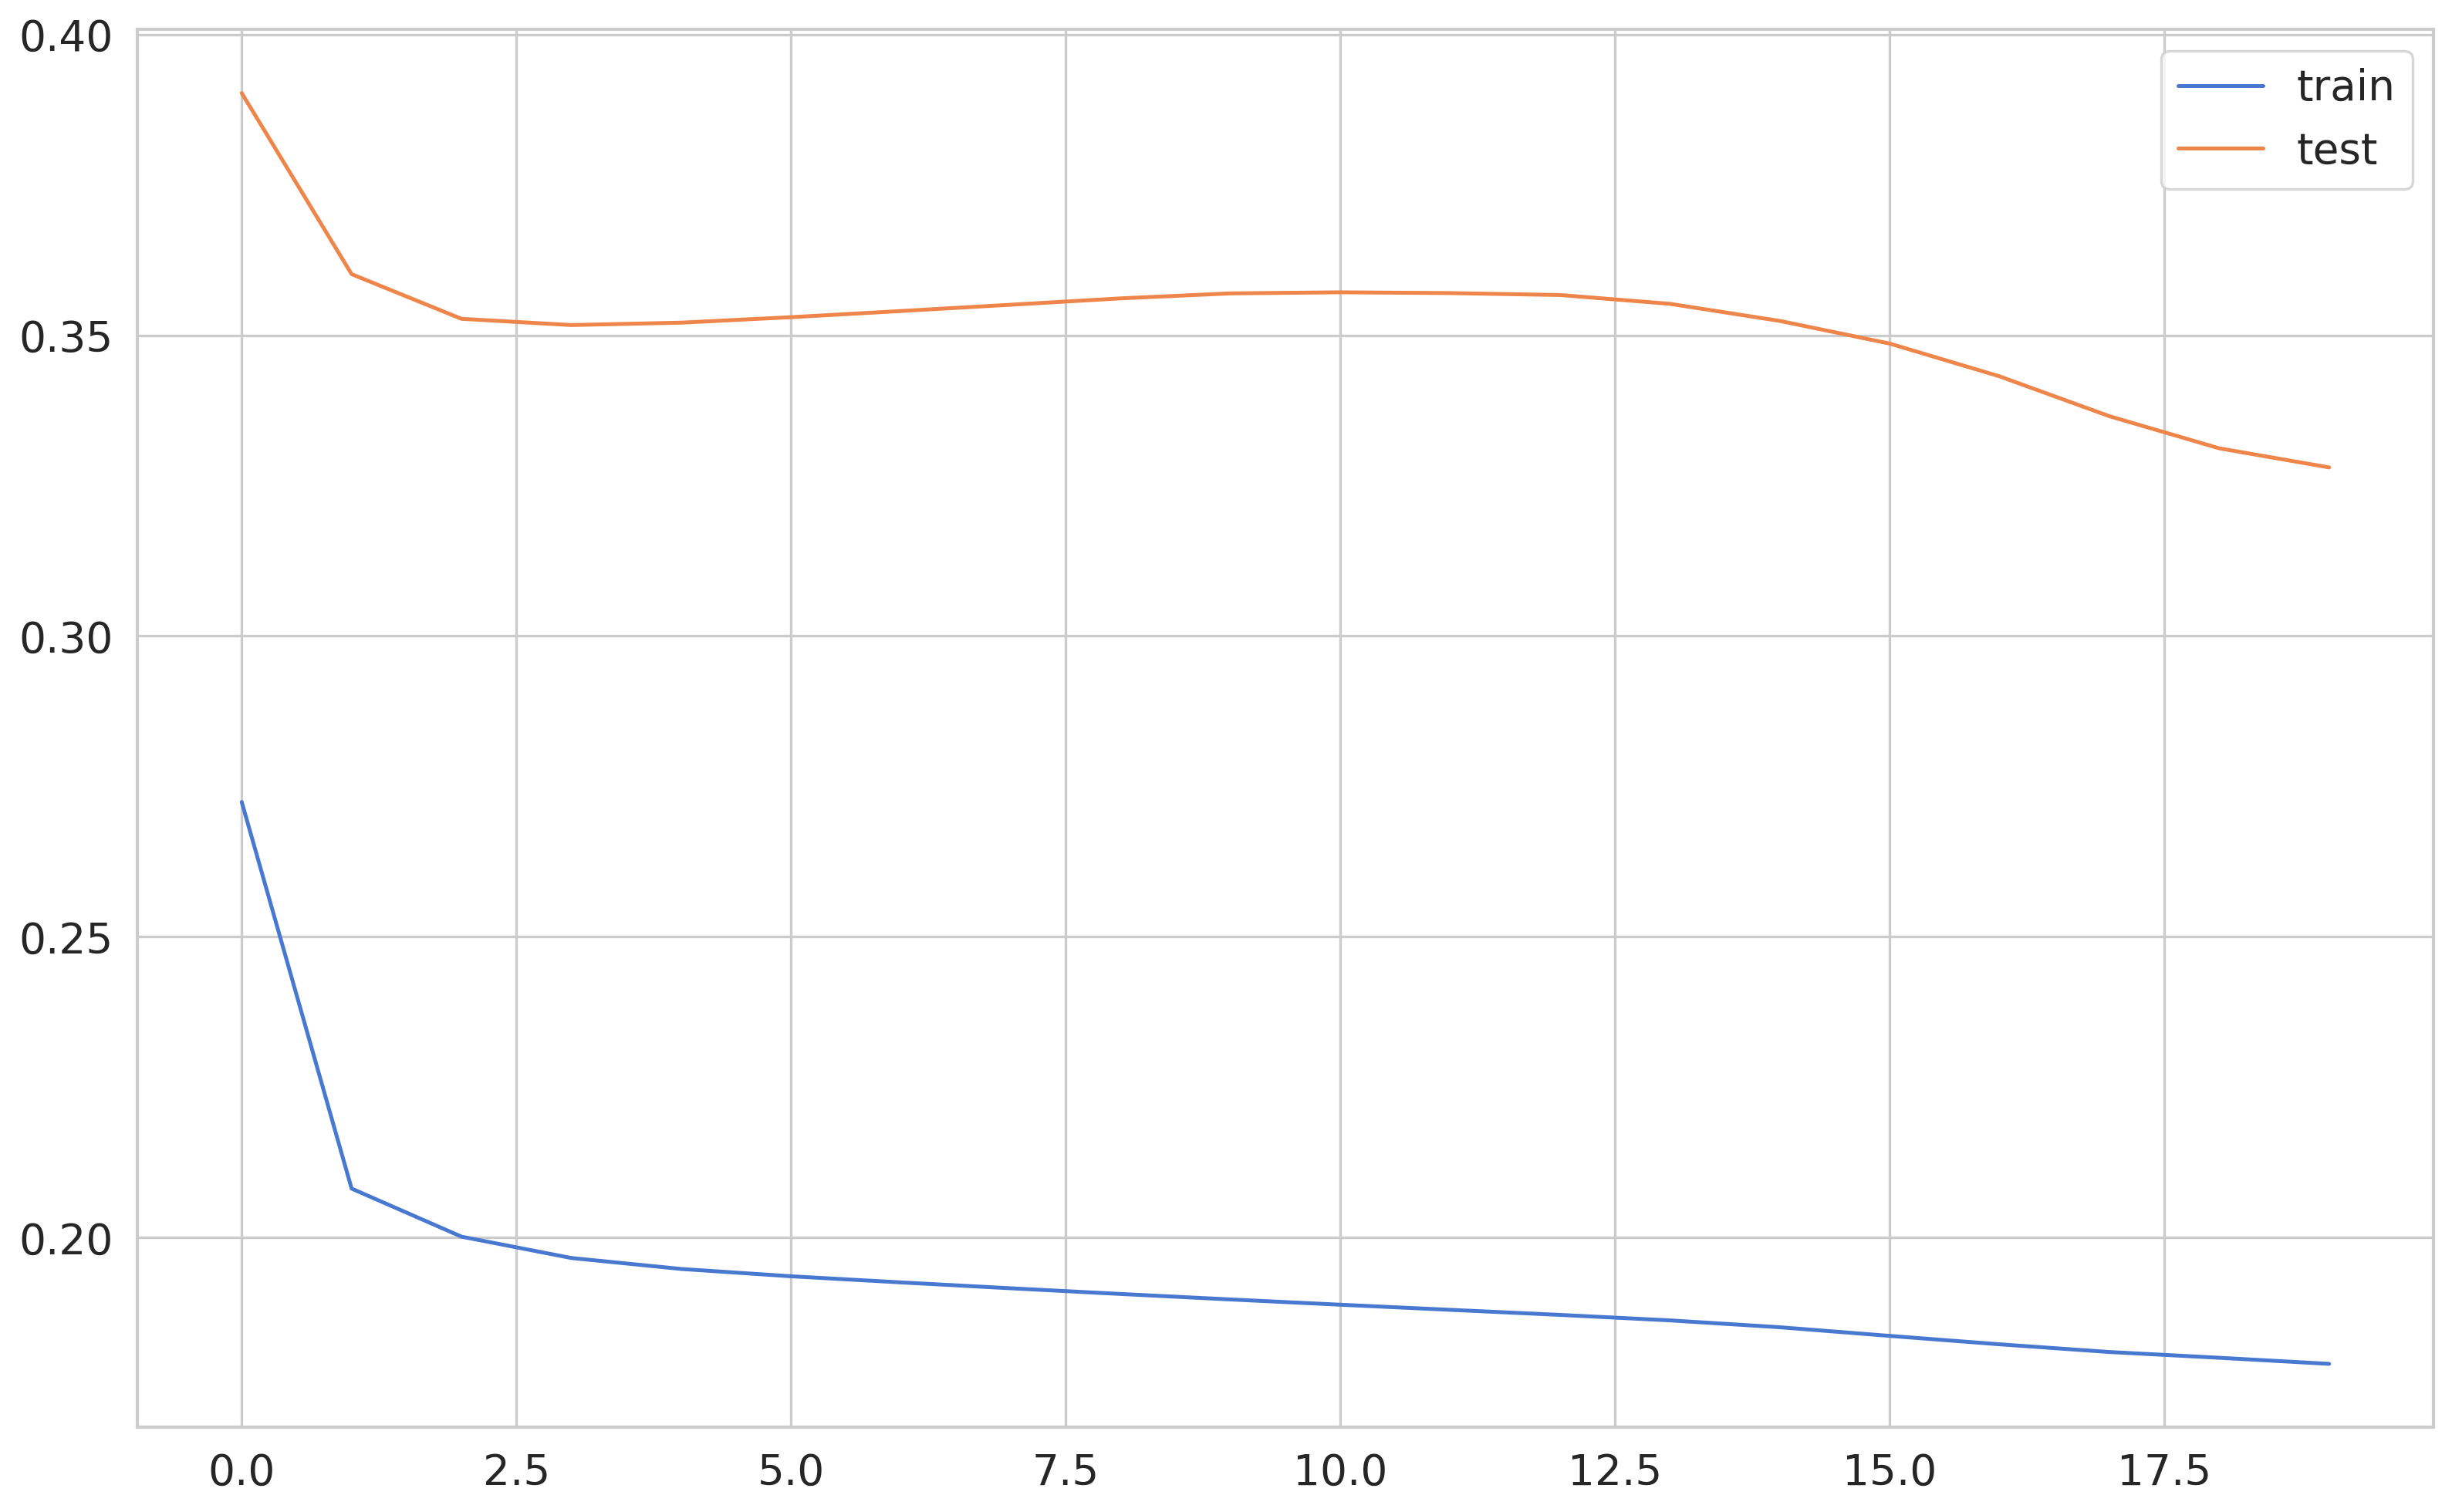

In [30]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [31]:
y_pred = model.predict(X_test)

69/69 [==============================] - 1s 9ms/step


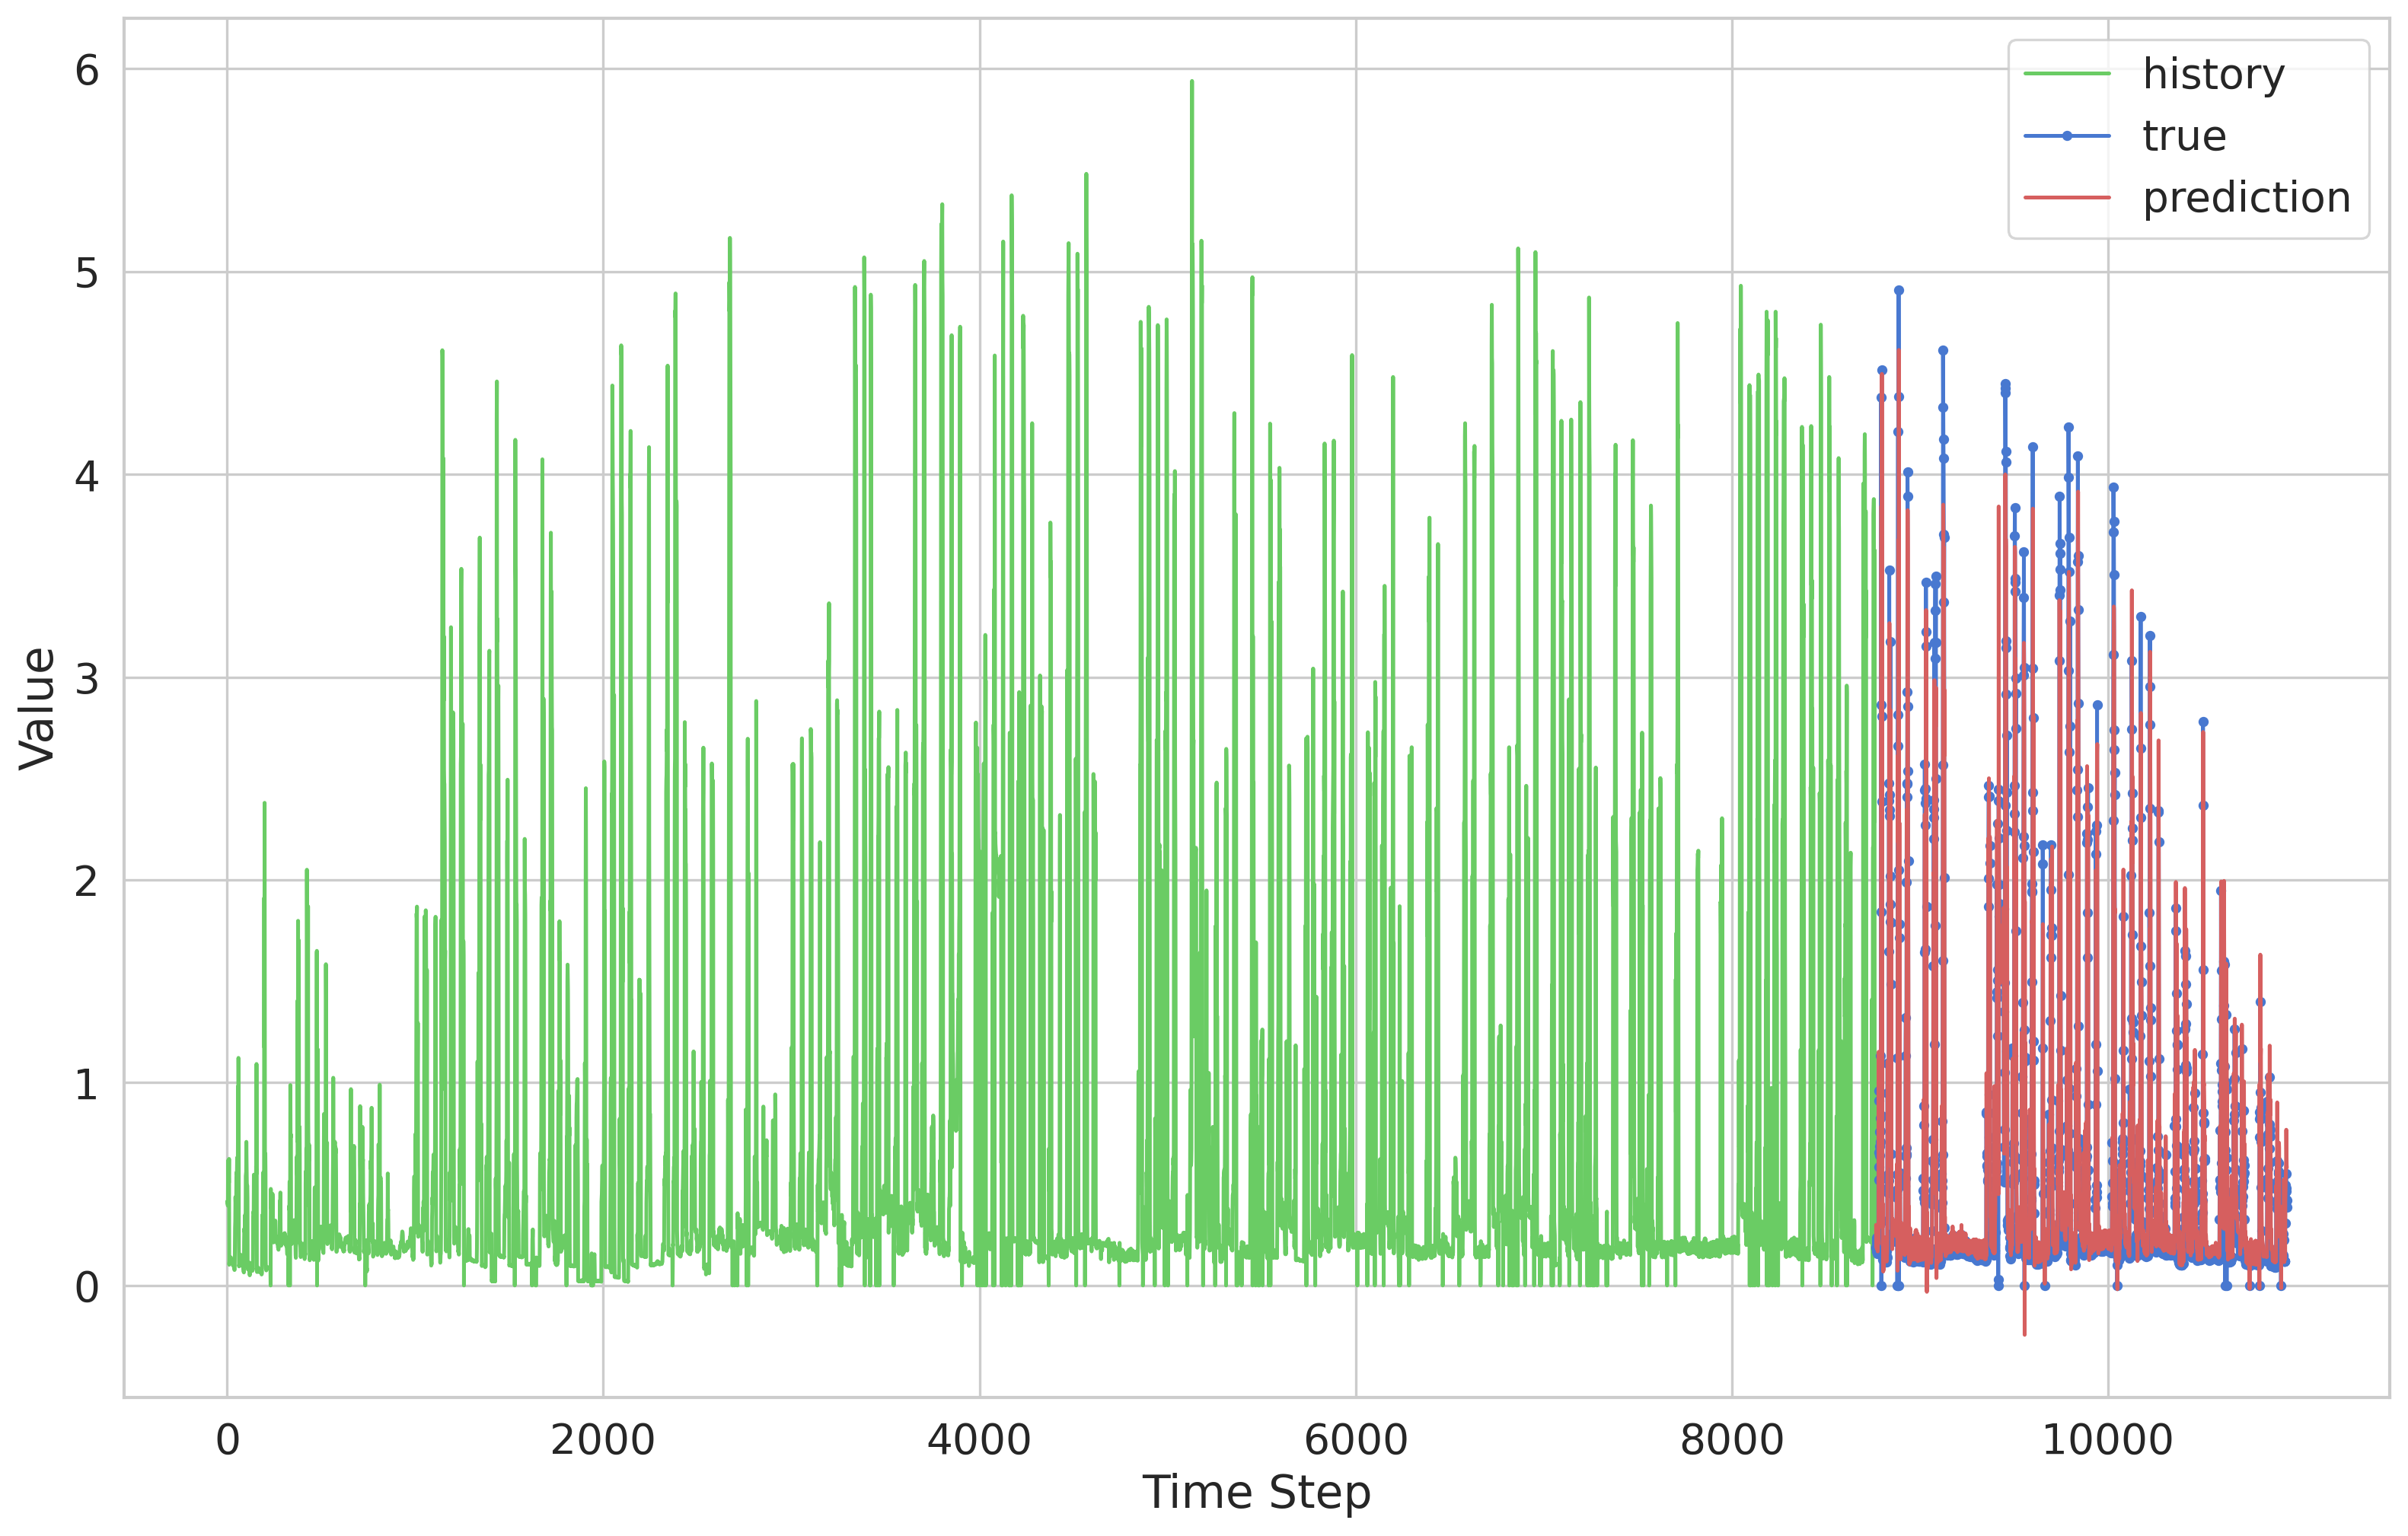

In [33]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

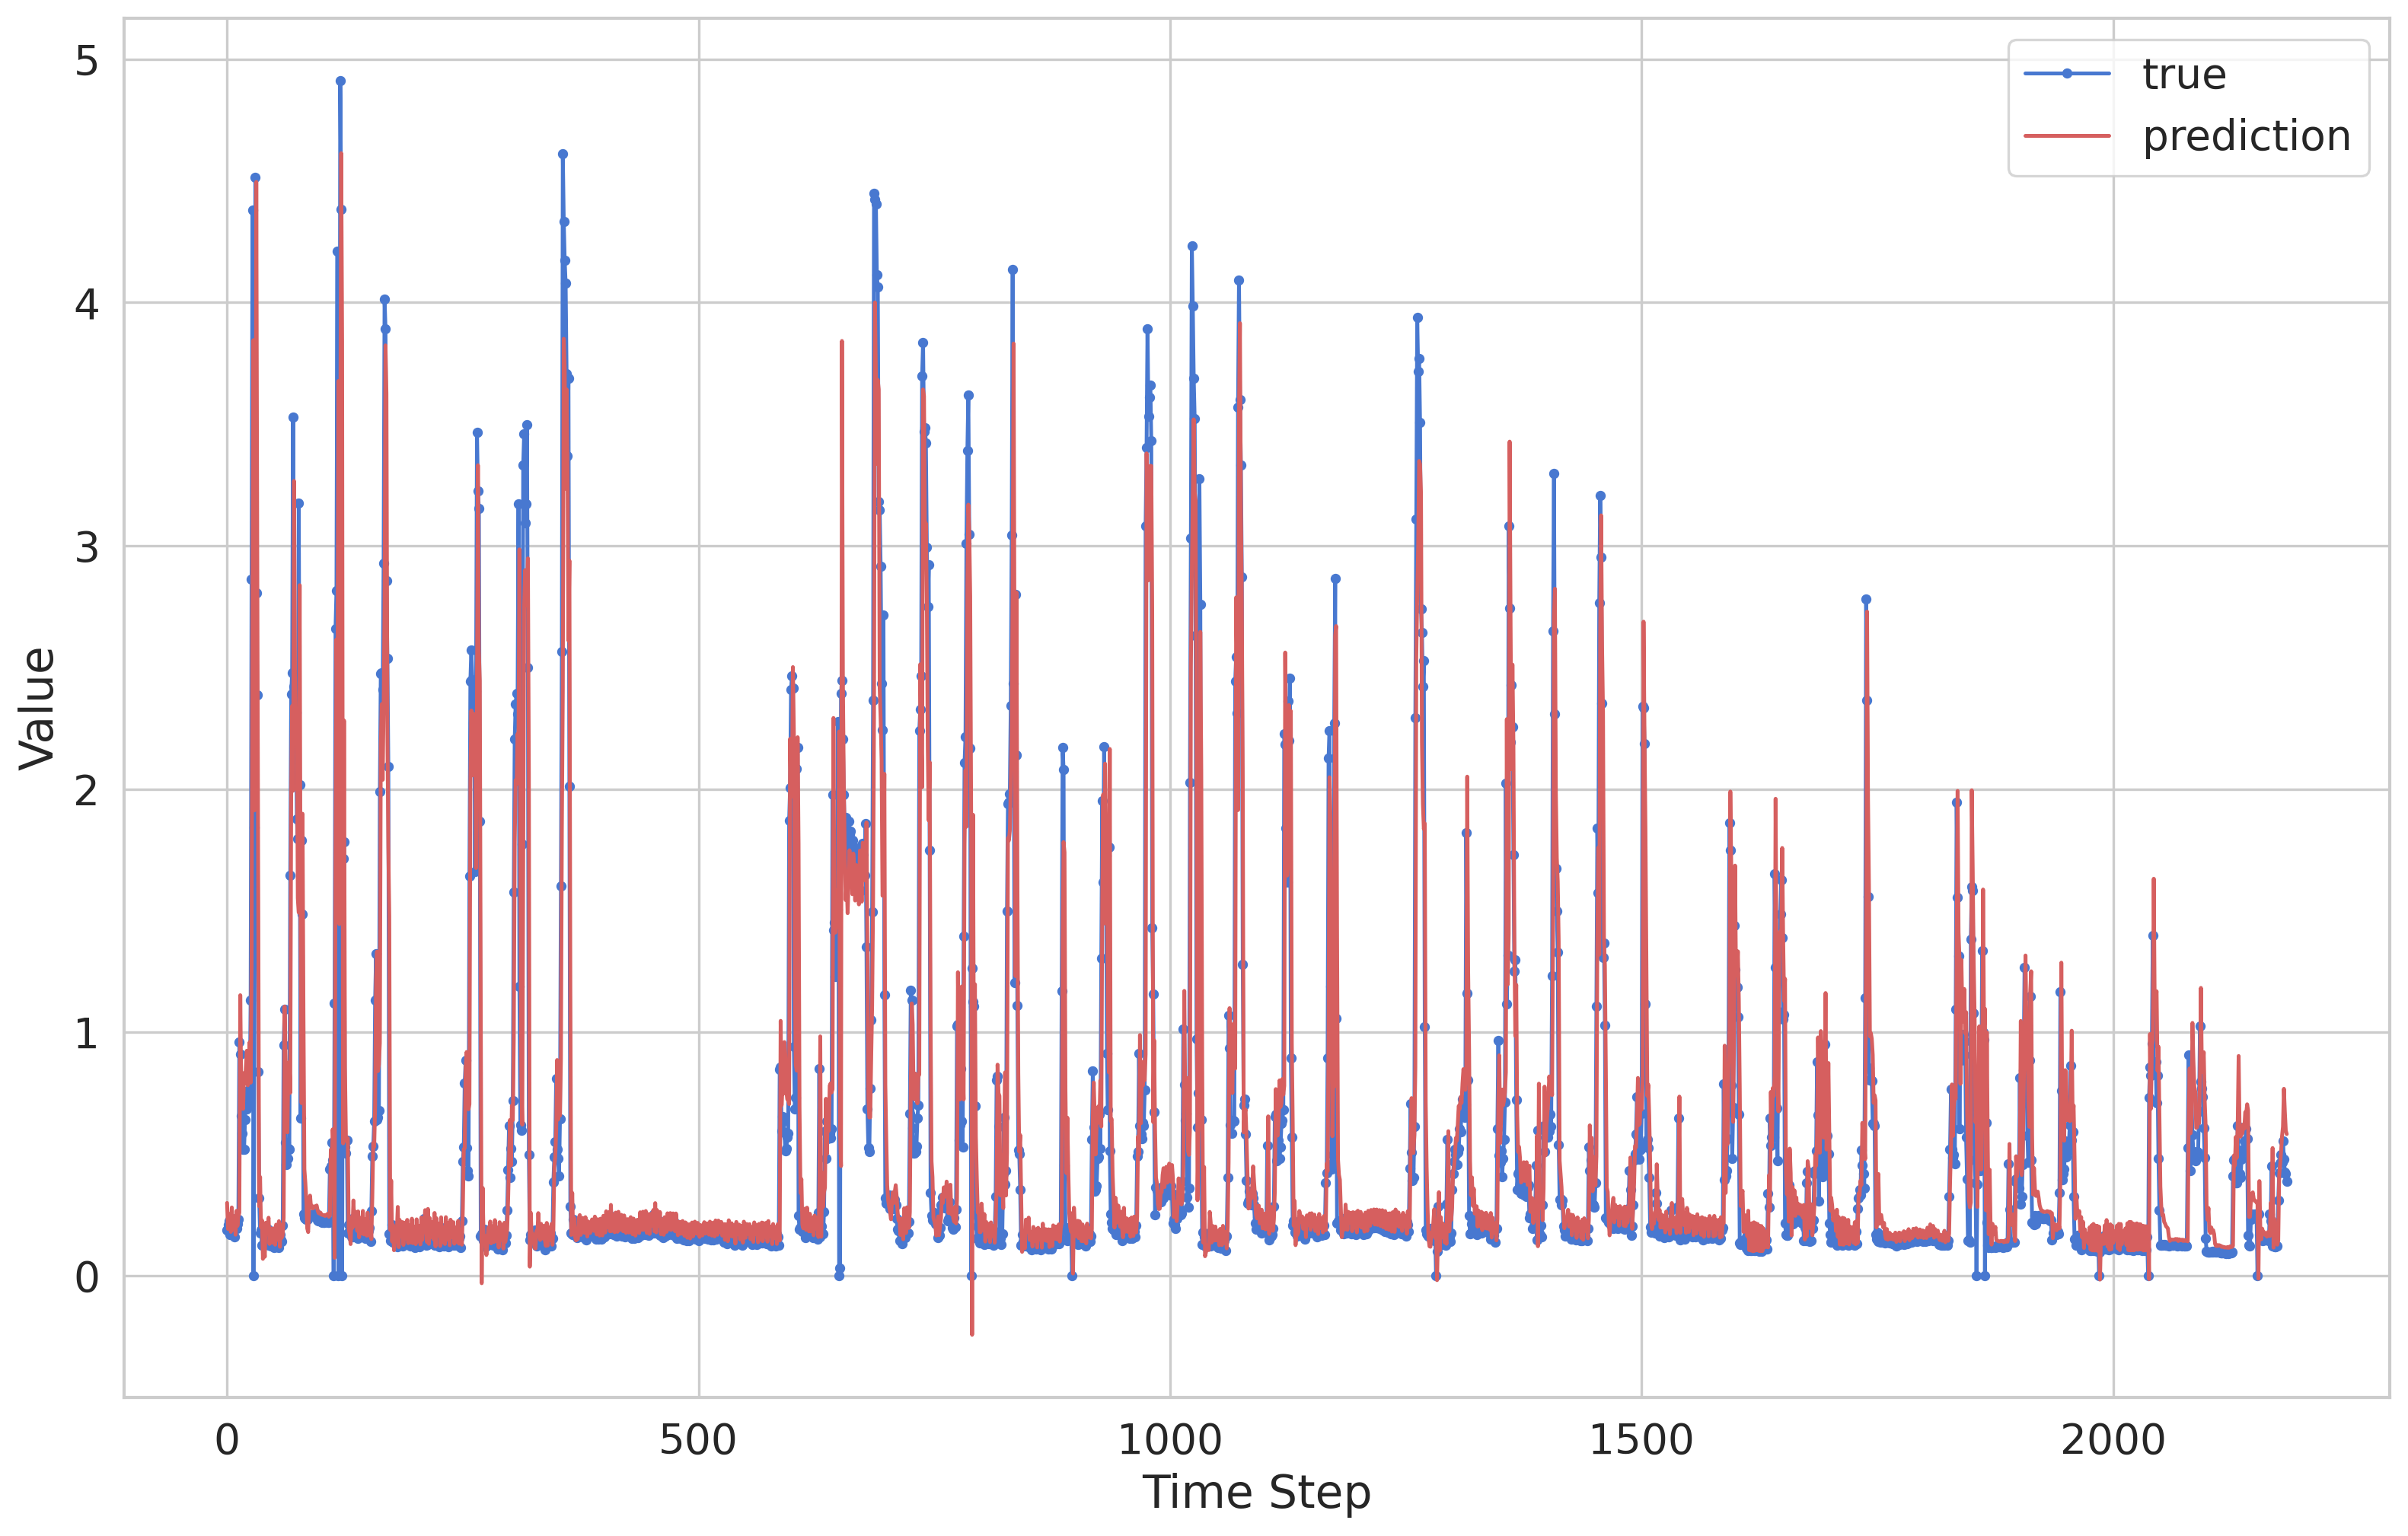

In [34]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [37]:
from sklearn.metrics import r2_score

print("R2 Score = ", r2_score(y_test,y_pred))

R2 Score =  0.7757783117501613


In [38]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error = ", mean_squared_error(y_test, y_pred, squared=False))

Mean Squared Error =  0.375612373771778
